sat
[y_1_1 = 2,
 y_0_3 = 22,
 x_0_1 = 3,
 x_0_4 = 3,
 y_2_4 = 21,
 x_0_5 = 10,
 x_2_1 = 9,
 y_2_1 = -1,
 x_0_3 = 4,
 y_2_2 = -2,
 x_2_2 = 8,
 y_2_3 = 0,
 y_1_4 = -4,
 x_2_4 = 6,
 x_1_4 = 16,
 y_0_2 = 3,
 y_0_5 = 23,
 x_1_5 = 18,
 y_1_5 = -5,
 x_0_2 = 5,
 x_2_3 = 7,
 x_2_5 = 17,
 x_1_2 = 10,
 x_1_3 = 16,
 y_0_4 = 23,
 y_2_5 = 21,
 y_1_3 = -5,
 x_1_1 = 8,
 y_0_1 = 4,
 y_1_2 = -6,
 x_2_6 = 20,
 y_1_0 = 1,
 y_2_0 = 0,
 y_2_6 = 20,
 x_2_0 = 0,
 x_1_0 = 9,
 y_1_6 = 13,
 y_0_6 = 23,
 y_0_0 = 5,
 x_0_0 = 3,
 x_0_6 = 15,
 x_1_6 = 17]


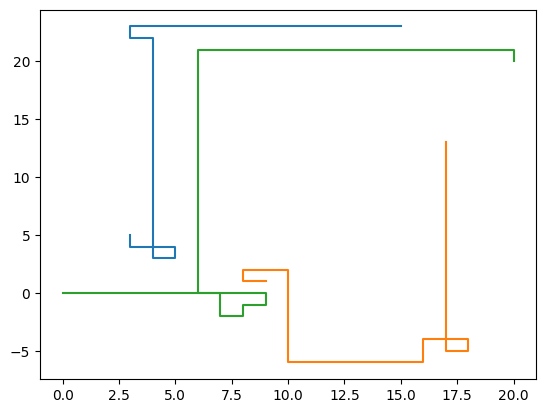

In [104]:
from matplotlib import pyplot as plt

import z3
z3.set_param("parallel.enable", "true")

def Abs(x):
    return z3.If(x >= 0,x,-x)

def Max(x, y):
    return z3.If(x>=y, x, y)

def Min(x, y):
    return z3.If(x<=y, x, y)

def collision(xa1, xa2, ya, xb, yb1, yb2):
    return z3.Or(xb < Min(xa1,xa2) , xb > Max(xa1,xa2) , ya < Min(yb1,yb2) , ya > Max(yb1,yb2))

def make_sig(x, y, n=4):
    return [(x[int(i/2)],x[int(i/2+1)],y[int(i/2)]) if i%2==0 else (x[int(i/2+0.5)],y[int(i/2)],y[int(i/2+0.5)]) for i in range(n)]

def collision_model(sig1, sig2):
    l = []
    for i1, s1 in enumerate(sig1):
        for i2, s2 in enumerate(sig2):
            if i1 % 2 == 0:
                if i2 % 2 == 1:
                    l.append(collision(s1[0], s1[1], s1[2], s2[0], s2[1], s2[2]))
            if i1 % 2 == 1:
                if i2 % 2 == 0:
                    l.append(collision(s2[0], s2[1], s2[2], s1[0], s1[1], s1[2]))
    return l

def declare_all_signals(nbr_sigs, nbr_segms):
    return [[[z3.Int(f"x_{k}_{i}"), z3.Int(f"y_{k}_{i}")] for i in range(nbr_segms)] for k in range(nbr_sigs)]

def make_all_signals(s):
    return [make_sig([x[0] for x in e], [y[1] for y in e], int(2*len(e)-2)) for e in s]

def sigs2plot(m, pts):
    xv = [[m[e[0]].as_long() for e in p if m[e[0]] is not None] for p in pts]
    yv = [[m[e[1]].as_long() for e in p if m[e[1]] is not None] for p in pts]
    v = [[(xv[k][int(i/2+0.5)], yv[k][int(i/2)]) for i in range(len(xv[k])+len(yv[k])-1)] for k in range(len(xv))]
    return [h for g in [[*zip(*f)] for f in v] for h in g]

def make_all_collisions(sigs):
    return [e for i in range(len(sigs)) for k in range(len(sigs)) for e in collision_model(sigs[i],sigs[k]) if i != k]
    

s = z3.Solver()



pts = declare_all_signals(3, 7)



sigs = make_all_signals(pts)

s.add(make_all_collisions(sigs))

        



s.add(pts[0][0][0] == 3)
s.add(pts[0][0][1] == 5)
s.add(pts[0][-1][0] == 15)
s.add(pts[0][-1][1] == 23)

s.add(pts[1][0][0] == 9)
s.add(pts[1][0][1] == 1)
s.add(pts[1][-1][0] == 17)
s.add(pts[1][-1][1] == 13)

s.add(pts[2][0][0] == 0)
s.add(pts[2][0][1] == 0)
s.add(pts[2][-1][0] == 20)
s.add(pts[2][-1][1] == 20)


print(s.check())
m = s.model()
print(m)


plt.plot(*sigs2plot(m,pts))

plt.show()



In [243]:
m[m[0]].as_long()

24

In [12]:
def colision(xa1, xa2, ya, xb, yb1, yb2):
    return xb < min(xa1,xa2) or xb > max(xa1,xa2) or ya < min(yb1,yb2) or ya > max(yb1,yb2)

In [14]:
colision(3, 8, 5, 3, 1, 9)

False

In [9]:
l1 = [5, 4, 2, -3,1]
x = 0
y = 0
pts = []
for i, e in enumerate(l1):
    print(f"{i}:{e}")
    if i % 2 == 0:
        x += e
    else:
        y += e
    pts.append((x,y))
print(pts)

0:5
1:4
2:2
3:-3
4:1
[(5, 0), (5, 4), (7, 4), (7, 1), (8, 1)]


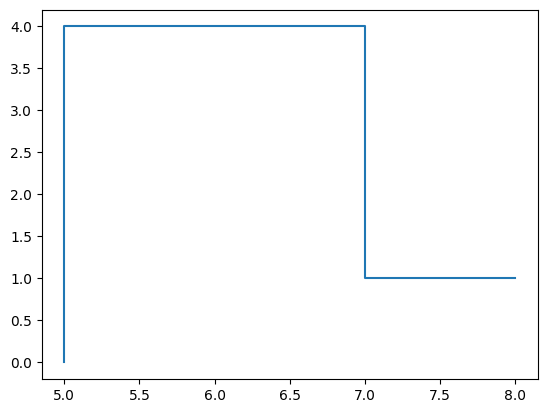

In [10]:
from matplotlib import pyplot as plt
plt.plot(*zip(*pts))

In [116]:
[3,i for i in range(7)]

SyntaxError: did you forget parentheses around the comprehension target? (3726534326.py, line 1)

In [267]:
print(*zip(*ptsa))

(3, 15, 15, 16, 16, 15, 15) (5, 5, -2, -2, 16, 16, 23)


In [281]:
{e: m[e] for e in m}

{ya1: 24,
 xb2: -3,
 yc2: -2,
 yb1: 4,
 xa2: 16,
 yb2: 3,
 yc1: 2,
 ya2: 24,
 xc1: -1,
 xb1: 17,
 xa1: 15,
 xc2: -2,
 yb0: 1,
 ya0: 5,
 xb0: 9,
 xc0: 0,
 xb3: 17,
 xa3: 15,
 yc0: 0,
 xa0: 3,
 yc3: 20,
 xc3: 20,
 yb3: 13,
 ya3: 23}

In [53]:
e = [[[1,2],[3,4],[5,6]], [[11,12],[13,14],[15,16]]]

In [76]:
[h for g in [[*zip(*f)] for f in e] for h in g]

[(1, 3, 5), (2, 4, 6), (11, 13, 15), (12, 14, 16)]